In [1]:
#Taxi problem

# Re-run this cell to install and import the necessary libraries and load the required variables
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100

# Observation Space , Action Space

In [109]:
env.observation_space.n, env.action_space.n

(500, 6)

Observation Space contains 500 states and action state contains 6 possible actions.

500 | 25 taxi positions, 5 potential passenger locations, and 4 destinations.

Observation Space: Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations.

Rewards System: Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.


# Initialize Q values

In [110]:
n_state = 500
n_action = 6
Q = np.zeros((n_state,n_action))

#Update Q table
# Q(s,a) = (1-alpha)Q(s,a) + alpha[r + gamma *max_over_next_action(Q(s',a'))]

In [3]:
#define hyper params
n_state = 500
n_action = 6
Q = np.zeros((n_state,n_action))
alpha = 0.1
gamma = 0.9

def update_q_table(state,action,reward,next_state,Q):
    old_value = Q[state,action]
    new_value = max(Q[next_state])
    Q[state,action] = (1-alpha)*old_value + alpha*(reward+gamma*new_value)
    return Q
    

# Implement Q table

In [4]:
num_episode = 1000
episode_reward_array = np.zeros((1000,1))
for ite in range(num_episode):
    state, info = env.reset()
    terminated = False
    episode_reward = 0
    action_ite=1
    while not terminated:
        if action_ite<=max_actions:
            action_ite+=1
            action = env.action_space.sample() #random action
            next_state, reward, terminated, truncated, info = env.step(action) 
            Q = update_q_table(state,action,reward,next_state,Q)
            episode_reward+=reward
            state = next_state
        else:
            terminated=True
    
    
    episode_reward_array[ite] = episode_reward
    if ite%100 ==0:
        print(ite)
    

0
100
200
300
400
500
600
700
800
900


In [5]:
np.mean(episode_reward_array) # average reward per episode for randomnly selected action

-392.256

# Now instead of random action, take the best action based on the Q table

In [6]:
#define hyper params
n_state = 500
n_action = 6
Q = np.zeros((n_state,n_action))
alpha = 0.1
gamma = 0.9

def update_q_table(state,action,reward,next_state,Q):
    old_value = Q[state,action]
    new_value = max(Q[next_state])
    Q[state,action] = (1-alpha)*old_value + alpha*(reward+gamma*new_value)
    return Q
    

In [13]:
num_episode = 1000
episode_reward_array = np.zeros((num_episode,1))
max_actions=100

penalties_in_each_episode = [] #illegal drop off / pick up (-10)
for ite in range(num_episode):
    state, info = env.reset()
    terminated = False
    episode_reward = 0
    action_ite=0
    #print(state)
    best_state=[]
    best_action=[]
    best_reward=[]
    penalties=0
    penalty_list =[]
    
    if ite==0:
          best_episode_reward = -100
    
    while not terminated:
        if action_ite<=max_actions:
            action_ite+=1
            action = np.argmax(Q[state]) #best action
            
            best_state.append(state)
            best_action.append(action)
            
            #print(action_ite)
            
            next_state, reward, terminated, truncated, info = env.step(action) 
            Q = update_q_table(state,action,reward,next_state,Q)
            best_reward.append(reward)
            episode_reward+=reward
            state = next_state
            if reward == -10:
                penalties+=1
                
            #print("reward at each step: ",reward)
            #print(terminated, truncated)
            #print(reward)
        else:
            terminated=True
            #print("It is terminated")
    print("episode_reward",episode_reward)
    penalties_in_each_episode.append(penalties)
    if episode_reward>best_episode_reward:
        print("------>",episode_reward)
        best_episode_reward=episode_reward
        chosen_state  = best_state
        chosen_action = best_action
        chosen_reward = best_reward
        chosen_env = env
        penalty_list.append(penalties)
    #print("best episode reward is : ",best_episode_reward)
    episode_reward_array[ite] = episode_reward

episode_reward 7
------> 7
episode_reward 5
episode_reward 8
------> 8
episode_reward 7
episode_reward 5
episode_reward 5
episode_reward 5
episode_reward 11
------> 11
episode_reward 7
episode_reward 4
episode_reward 15
------> 15
episode_reward 13
episode_reward 4
episode_reward 15
episode_reward 4
episode_reward 8
episode_reward 10
episode_reward 5
episode_reward 13
episode_reward 12
episode_reward 5
episode_reward 8
episode_reward 8
episode_reward 8
episode_reward 9
episode_reward -3
episode_reward 7
episode_reward 6
episode_reward 6
episode_reward 8
episode_reward 7
episode_reward 10
episode_reward 7
episode_reward 6
episode_reward 7
episode_reward 9
episode_reward 10
episode_reward 7
episode_reward 13
episode_reward 5
episode_reward 9
episode_reward 7
episode_reward 8
episode_reward 6
episode_reward 10
episode_reward 14
episode_reward 8
episode_reward 6
episode_reward 5
episode_reward 9
episode_reward 8
episode_reward 9
episode_reward 5
episode_reward 14
episode_reward 7
episode_r

episode_reward 10
episode_reward 3
episode_reward 14
episode_reward 7
episode_reward 9
episode_reward 8
episode_reward 12
episode_reward 7
episode_reward 6
episode_reward 7
episode_reward 7
episode_reward 8
episode_reward 7
episode_reward 9
episode_reward 9
episode_reward 7
episode_reward 10
episode_reward 10
episode_reward 7
episode_reward 5
episode_reward 9
episode_reward 9
episode_reward 9
episode_reward 7
episode_reward 9
episode_reward 10
episode_reward 13
episode_reward 14
episode_reward 7
episode_reward 6
episode_reward 9
episode_reward 10
episode_reward 5
episode_reward 7
episode_reward 7
episode_reward 5
episode_reward 4
episode_reward 10
episode_reward 10
episode_reward 6
episode_reward 11
episode_reward 6
episode_reward 5
episode_reward 6
episode_reward 9
episode_reward 9
episode_reward 7
episode_reward 9
episode_reward 5
episode_reward 4
episode_reward 4
episode_reward 10
episode_reward 6
episode_reward 5
episode_reward 13
episode_reward 7
episode_reward 8
episode_reward 7


In [14]:
import matplotlib.pyplot as plt
np.mean(episode_reward_array)

7.923

In [15]:
penalties_in_each_episode

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [16]:
chosen_reward

[-1, -1, -1, -1, -1, 20]

In [17]:
chosen_state

[408, 416, 316, 216, 116, 16]

In [18]:
chosen_action

[4, 1, 1, 1, 1, 5]

In [19]:
def render():
        state_image = env.render()
        plt.imshow(state_image)
        plt.show()

2
-1


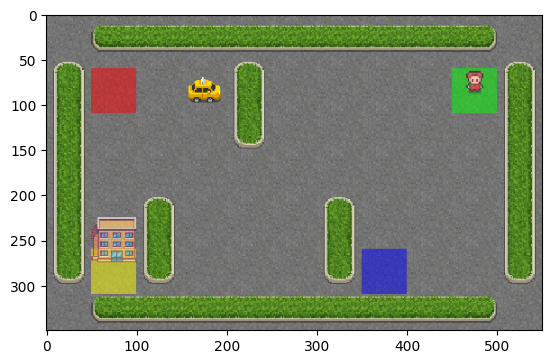

0
-1


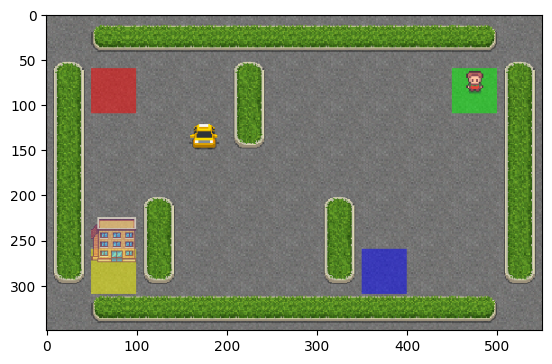

0
-1


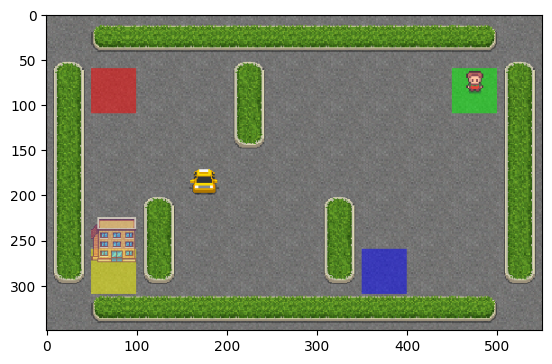

2
-1


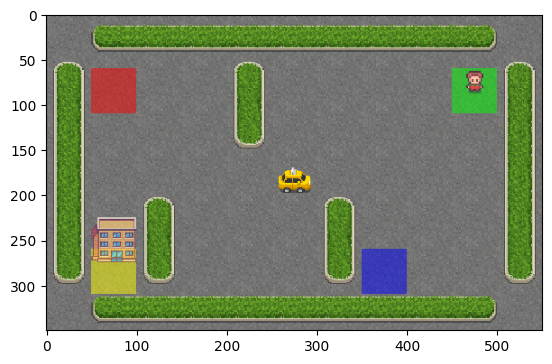

2
-1


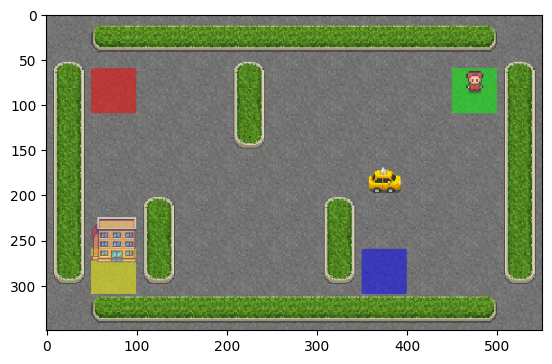

1
-1


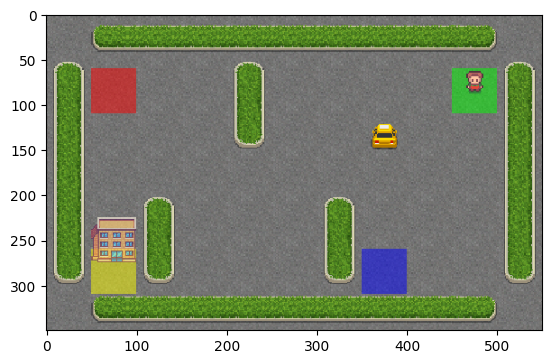

1
-1


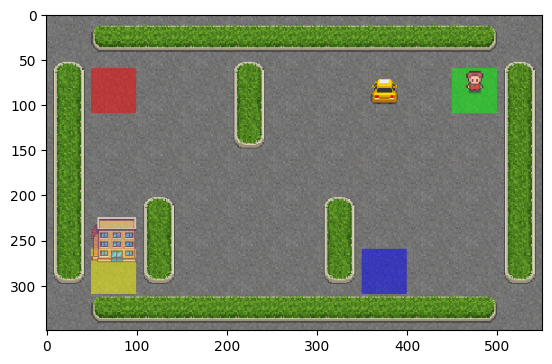

2
-1


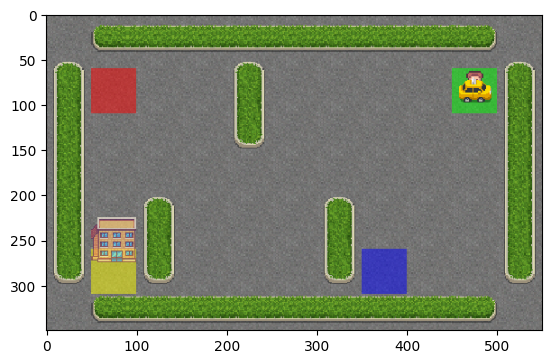

4
-1


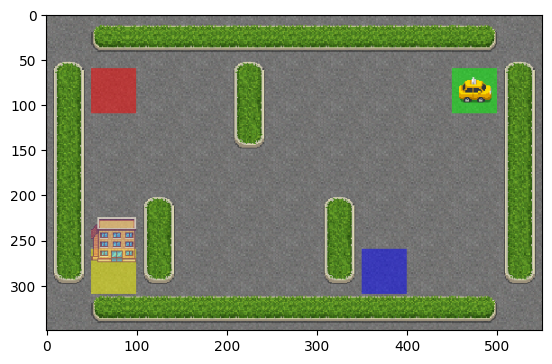

0
-1


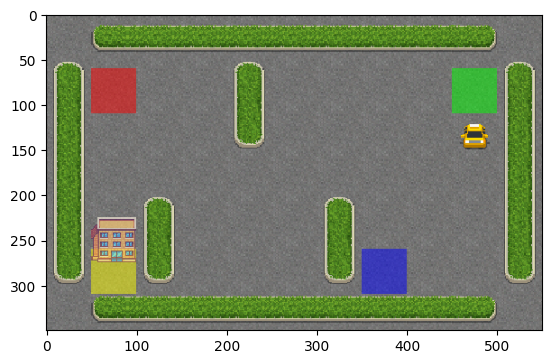

3
-1


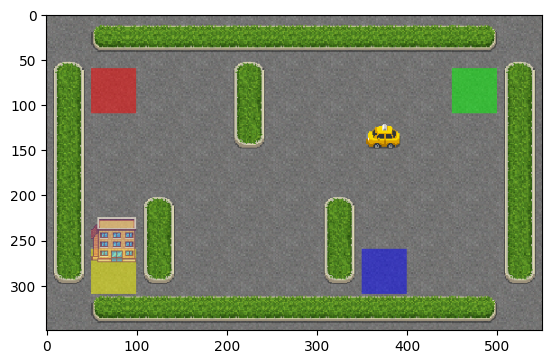

0
-1


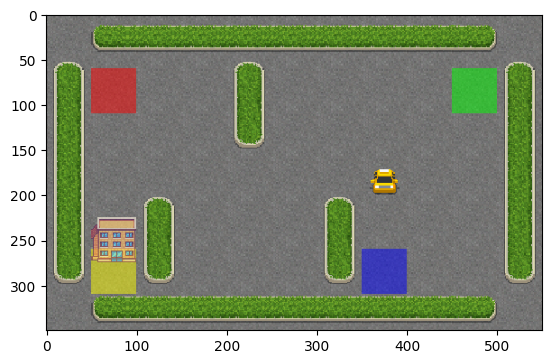

3
-1


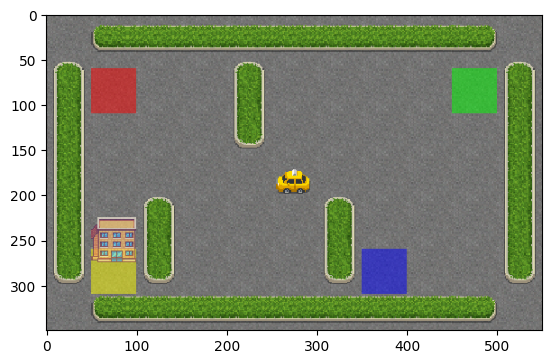

3
-1


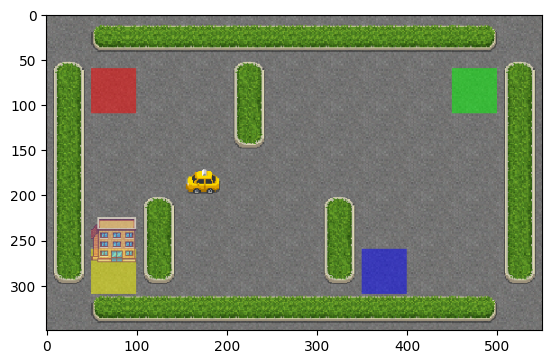

3
-1


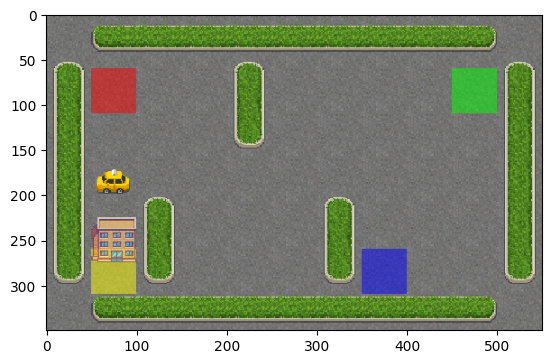

0
-1


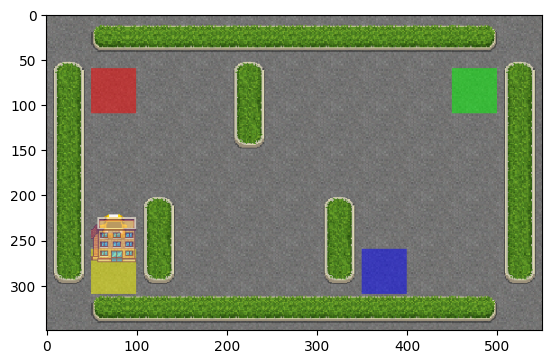

0
-1


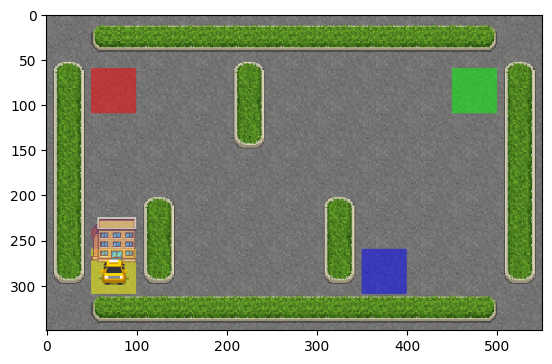

5
20


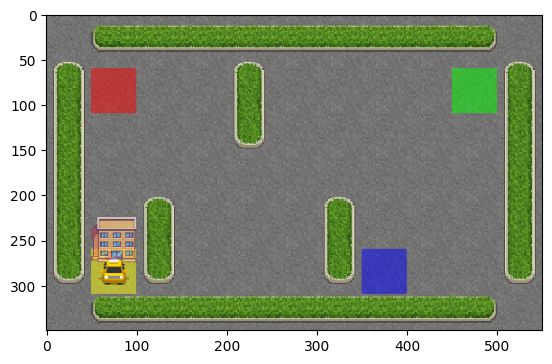

In [20]:
state, info = env.reset()
done = False
reward_score=0

while not done:
    
    action = np.argmax(Q[state])
    print(action)
    next_state, reward, done, truncated, info = env.step(action)
    #n_step+=1
    print(reward)
    reward_score+=reward
    render()
    state=next_state
    #print(n_step)

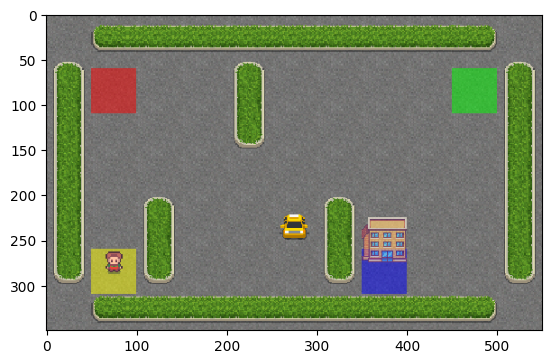

In [380]:
state, info = env.reset()
render()

/home/p302793/anaconda3/envs/tf-gpu/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


{0: {0: [(1.0, 100, -1, False)],
  1: [(1.0, 0, -1, False)],
  2: [(1.0, 20, -1, False)],
  3: [(1.0, 0, -1, False)],
  4: [(1.0, 16, -1, False)],
  5: [(1.0, 0, -10, False)]},
 1: {0: [(1.0, 101, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 21, -1, False)],
  3: [(1.0, 1, -1, False)],
  4: [(1.0, 17, -1, False)],
  5: [(1.0, 1, -10, False)]},
 2: {0: [(1.0, 102, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 22, -1, False)],
  3: [(1.0, 2, -1, False)],
  4: [(1.0, 18, -1, False)],
  5: [(1.0, 2, -10, False)]},
 3: {0: [(1.0, 103, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 23, -1, False)],
  3: [(1.0, 3, -1, False)],
  4: [(1.0, 19, -1, False)],
  5: [(1.0, 3, -10, False)]},
 4: {0: [(1.0, 104, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 24, -1, False)],
  3: [(1.0, 4, -1, False)],
  4: [(1.0, 4, -10, False)],
  5: [(1.0, 4, -10, False)]},
 5: {0: [(1.0, 105, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 25, -1, False)],
  3: [(1.0, 5, -1, False)

In [32]:
np.random.choice(np.arange(1,2),32)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [1]:
import numpy as np
import pandas as pd

In [2]:
file1 = np.load("file.npy")

In [4]:
import matplotlib.pyplot as plt

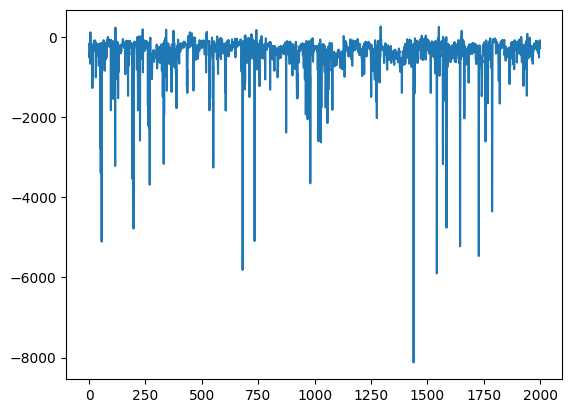

In [9]:
plt.plot(file1)
#plt.ylim(-20)

In [11]:
# Deep Q Network
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class  nn_model(nn.Module):
      def __init__(self,env):
          super(nn_model,self).__init__()
          self.env = env
          self.n_actions = env.action_space.n
          self.input_dim = env.observation_space.shape[0] # n_states are passed on to as input dim
          self.layer1 = nn.Linear(self.input_dim,128)
          self.layer2 = nn.Linear(128,128)
          self.layer3 = nn.Linear(128,self.n_actions)
      def forward(self, state):
          activation1 = F.relu(self.layer1(state))
          activation2 = F.relu(self.layer2(activation1))
          output = self.layer3(activation2)
          return output

class DQN():
    def __init__(self) -> None:
        
        self.env = self.create_env()
        self.load_hyperparams()
        self.train()

    def load_hyperparams(self):
        self.gamma = 0.99
        self.n_episodes = 1000
        self.epsilon = 1
        self.mini_batch_size = 8
        self.max_memory_size = 1000   #check mini_batch_size ratio over max_memory_size (check literature)
        self.replay_memory=[]
        self.model = nn_model(self.env)
        self.loss_fn = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.0001)
    
    def create_env(self):
        self.env = gym.make("LunarLander-v2")
        #self.env.seed(1)
        return self.env
    
    def replay(self, replay_memory):
        
        minibatch = np.random.choice(replay_memory, self.mini_batch_size, replace=True)

        #print(minibatch['state'])
        #for i, sample in enumerate(minibatch):
        #       print(f"Sample {i} state shape: {np.array(sample['state']).shape}")

        
        state_list      =      torch.from_numpy(np.array(list(map(lambda x: x['state'], minibatch))))
        action_list     =      np.array(list(map(lambda x: x['action'], minibatch)))
        reward_list     =      np.array(list(map(lambda x: x['reward'], minibatch)))
        next_state_list =      torch.from_numpy(np.array(list(map(lambda x: x['next_state'], minibatch))))
        done_list       =      np.array(list(map(lambda x: x['done'], minibatch)))

        q_values_next_state        =      self.model(next_state_list)

        q_values_current_state     =      self.model(state_list)

        q_values_update            =      self.model(state_list)

        for ite,(state,action,reward,q_values_next_state, done) in enumerate(zip(state_list,action_list,reward_list,q_values_next_state, done_list)): 
            if not done:  
                target = reward + self.gamma * np.max(q_values_next_state.detach().numpy())
            else:
                target = reward

            q_values_update[ite][action] = target
        
        loss = self.loss_fn(q_values_update, q_values_current_state)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step() 

        return self.model

    
    def train(self):
        env = self.env
        
        self.episode_rewards = []
        for episode in range(self.n_episodes):
            state = env.reset()
            done = False
            sum_reward = 0
            state= state[0]
            self.len_state = len(state)
            while not done:
                #print("{}".format(state[0]))
                q_action = self.model(torch.from_numpy(np.reshape(state,[1,self.len_state]))) #output from DQN model
                
                #print("-------------------------------------------------This has passed successfully---------------------------------------------")
                #print(state)
                #take action according to epsilon-greedy policy
                if np.random.rand() < self.epsilon: 
                    action = env.action_space.sample()
                else:
                    action = np.argmax(q_action.detach().numpy())
                #print(env.step(action))
                # execute the action 
                next_state, reward, done, info, _ = env.step(action)
                
                # add reward to the sum
                sum_reward += reward
                
                #print("this is before: {} {}".format(state, next_state))
                # add the transition to the replay memory
                if len(self.replay_memory) < self.max_memory_size:
                    self.replay_memory.append({"state":state, "action":action, "reward":reward, "next_state":next_state, "done":done})
                else:
                    self.replay_memory.pop(0)
                    
                #add replay functionality here
                self.model  = self.replay(self.replay_memory)

                #update state
                state = next_state                
                
                if self.epsilon > 0.01:
                    self.epsilon -= 0.01
            
            print(f"Episode: {episode}, Reward: {sum_reward}")
            self.episode_rewards.append(sum_reward) 
        #with open("file.txt", "w") as output:
            np.save("file.npy", np.array(self.episode_rewards))


if __name__ == "__main__":
    dqn = DQN()


Episode: 0, Reward: -289.1001187528205
Episode: 1, Reward: -571.535709131817
Episode: 2, Reward: -523.0500284069526
Episode: 3, Reward: -129.4659958728301
Episode: 4, Reward: -156.5130036761223
Episode: 5, Reward: -282.6912200186937
Episode: 6, Reward: -208.06282931240239
Episode: 7, Reward: -130.27404107340698
Episode: 8, Reward: -508.4705085773577
Episode: 9, Reward: -505.3596890200726
Episode: 10, Reward: -190.52743711815776
Episode: 11, Reward: -32.35556911614232
Episode: 12, Reward: -233.3331635228954
Episode: 13, Reward: -132.68882503441856
Episode: 14, Reward: -164.42869870394333
Episode: 15, Reward: -355.86925685025153
Episode: 16, Reward: -578.6455831317265
Episode: 17, Reward: -313.37186550282706
Episode: 18, Reward: -159.4054361772029
Episode: 19, Reward: -118.19268872261708
Episode: 20, Reward: -112.035671030452
Episode: 21, Reward: -132.77040734921468
Episode: 22, Reward: -155.15543998604969
Episode: 23, Reward: -140.87071510072533
Episode: 24, Reward: -88.64240381861268
E

KeyboardInterrupt: 

In [12]:
env = gym.make("LunarLander-v2")

In [32]:
env.observation_space.shape[0]

8

In [ ]:
f = fits.get